# Homework 4

You need to edit this `.ipynb` file by replacing "# Your code", "# Your answer", etc., click "Restart & Run All" in Jupyter Notebook to generate your results, and download it as an `.html` file. Please submit your `.ipynb` and `.html` files (instead of a `.zip` file) on Moodle. If you have questions regarding the homework, please email the TA Saumil Shah (sashah8@ncsu.edu), or attend our office hours.

In this homework, we will use Gurobi to solve a DC optimal power flow (OPF) problem while determining the locational marginal prices (LMPs) simultaneously, for the [modified PJM 5-bus system](https://doi.org/10.1109/PES.2010.5589973). I will briefly discuss this problem in the lecture. If you want to learn more, see "Introduction to Electricity Markets" on Moodle.

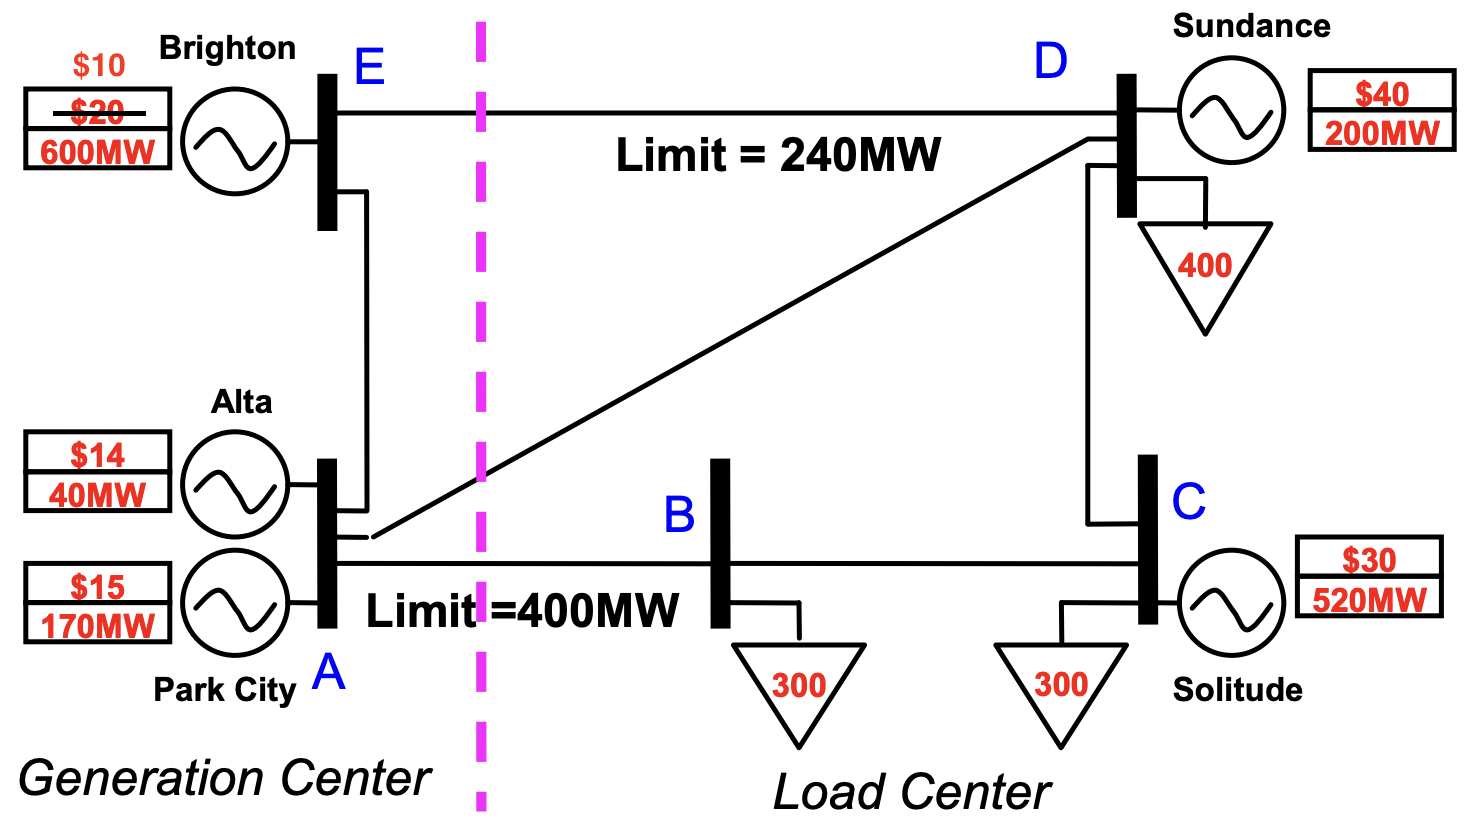

In [ ]:
from IPython.display import Image
Image('figs/case5.png', width=600)

The DC OPF problem is formulated as a linear programming problem:
$$
\begin{align*}
\min_{\boldsymbol{p}} \qquad & \boldsymbol{c}^T\boldsymbol{p} \\
\text{s.t.} \qquad & \boldsymbol{1}^T\boldsymbol{d} = \boldsymbol{1}^T\boldsymbol{p}, & & :\lambda \\
& \boldsymbol{S}'(\boldsymbol{W}'\boldsymbol{p} - \boldsymbol{d}') \le \boldsymbol{f}^{\max}, & & :\boldsymbol{\mu} \\
& -\boldsymbol{S}'(\boldsymbol{W}'\boldsymbol{p} - \boldsymbol{d}') \le \boldsymbol{f}^{\max}, & & :\boldsymbol{\nu} \\
& \boldsymbol{p}^{\min} \le \boldsymbol{p} \le \boldsymbol{p}^{\max}.
\end{align*}
$$
In this formulation, the only decision variables are the generation outputs $\boldsymbol{p}$. The generating limits are
$$
\boldsymbol{p}^{\min} = (0, 0, 0, 0, 0)^T, \quad \boldsymbol{p}^{\max} = (40, 170, 520, 200, 600)^T.
$$
The marginal costs are
$$
\boldsymbol{c} = (14, 15, 30, 40, 10)^T.
$$
The bus loads are
$$
\boldsymbol{d} = (0, 300, 300, 400, 0)^T.
$$
The line reactances are
$$
(x_{AB}, x_{AD}, x_{AE}, x_{BC}, x_{CD}, x_{DE})^T = (0.0281, 0.0304, 0.0064, 0.0108, 0.0297, 0.0297)^T.
$$
The line flow limits are
$$
\boldsymbol{f}^{\max} = (400, \infty, \infty, \infty, \infty, 240)^T.
$$
Let bus D be the slack bus. The bus net injections except the slack bus are
$$
\boldsymbol{W}'\boldsymbol{p} - \boldsymbol{d}',
$$
where $\boldsymbol{W}'$ is obtained by removing the row corresponding to the slack bus from the generator-bus incidence matrix $\boldsymbol{W}$:
$$
\boldsymbol{W} =
\begin{bmatrix}
1 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1
\end{bmatrix},
$$
and $\boldsymbol{d}'$ is obtained from $\boldsymbol{d}$ by removing the element corresponding to the slack bus. The matrix of power transfer distribution factors or generation shift factors, $\boldsymbol{S}'$, maps $\boldsymbol{W}'\boldsymbol{p} - \boldsymbol{d}'$ to the line flows. It can be shown that
$$
\boldsymbol{S}' = \boldsymbol{H}\boldsymbol{A}'(\boldsymbol{B}')^{-1},
$$
where $\boldsymbol{H}$ is a diagonal matrix of the reciprocals of the line reactances:
$$
\boldsymbol{H} = \operatorname{diag}\left(\frac{1}{x_{AB}}, \frac{1}{x_{AD}}, \frac{1}{x_{AE}}, \frac{1}{x_{BC}}, \frac{1}{x_{CD}}, \frac{1}{x_{DE}}\right),
$$
$\boldsymbol{A}'$ is obtained by removing the column corresponding to the slack bus from the bus-line incidence matrix $\boldsymbol{A}$:
$$
\boldsymbol{A} =
\begin{bmatrix}
1 & -1 & 0 & 0 & 0 \\
1 & 0 & 0 & -1 & 0 \\
1 & 0 & 0 & 0 & -1 \\
0 & 1 & -1 & 0 & 0 \\
0 & 0 & 1 & -1 & 0 \\
0 & 0 & 0 & 1 & -1
\end{bmatrix},
$$
and
$$
\boldsymbol{B}' = (\boldsymbol{A}')^T\boldsymbol{H}\boldsymbol{A}'.
$$
Moreover, define $\boldsymbol{S}$ as obtained by adding a zero column corresponding to the slack bus from $\boldsymbol{S}'$.

Once the problem is solved, the LMPs $\boldsymbol{\pi}$ can be calculated based on the dual optimal solution $(\lambda^*, \boldsymbol{\mu}^*, \boldsymbol{\nu}^*)$:
$$
\boldsymbol{\pi} = \underbrace{\lambda^*\boldsymbol{1}}_{\text{energy component}} + \underbrace{\boldsymbol{S}^T(\boldsymbol{\nu}^* - \boldsymbol{\mu}^*)}_{\text{congestion component}}.
$$
Note that we have not considered losses in the formulation; in practice, there is another loss component in the LMP.

Now formulate and solve the problem in Gurobi. The skeleton has been provided. you need to output the results in Table 7, Table 8, and Table 9 in the aforementioned paper. Also, to align with the Gurobi API, you need to express the problem in the following form:
$$
\begin{align*}
\min_{\boldsymbol{p}} \qquad & \boldsymbol{c}^T\boldsymbol{p} \\
\text{s.t.} \qquad & \boldsymbol{1}^T\boldsymbol{d} = \boldsymbol{1}^T\boldsymbol{p}, & & :\lambda \\
& -\boldsymbol{S}'\boldsymbol{W}'\boldsymbol{p} \ge -\boldsymbol{S}'\boldsymbol{d}' - \boldsymbol{f}^{\max}, & & :\boldsymbol{\mu} \\
& \boldsymbol{S}'\boldsymbol{W}'\boldsymbol{p} \ge \boldsymbol{S}'\boldsymbol{d}' - \boldsymbol{f}^{\max}, & & :\boldsymbol{\nu} \\
& \boldsymbol{p}^{\min} \le \boldsymbol{p} \le \boldsymbol{p}^{\max}.
\end{align*}
$$

In [1]:
# Your code
# import numpy as np
# import gurobipy as gp
# from gurobipy import GRB
# set p_min, p_max, mc, f_max, W_prime, d_prime, H, A_prime, B_prime, S_prime, S
# m = gp.Model()
# m.Params.LogToConsole = 0
# p = m.addMVar(5, lb=p_min, ub=p_max, obj=mc, name='p')
# m.modelSense = GRB.MINIMIZE
# c_lambda = m.addConstr(...)
# c_mu = m.addConstr(...)
# c_nu = m.addConstr(...)
# m.optimize()
# print optimal dispatch p
# print optimal value of the objective function
# print the LMP energy component
# print the LMP congestion components
# print the LMPs
# print the line flows

In [2]:
pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 21.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB

In [4]:
p_min = np.array([0, 0, 0, 0, 0])
p_max = np.array([40, 170, 520, 200, 600])
mc = np.array([14, 15, 30, 40, 10])
d = np.array([0, 300, 300, 400, 0])
x = np.array([0.0281, 0.0304, 0.0064, 0.0108, 0.0297, 0.0297])
f_max = np.array([400, np.inf, np.inf, np.inf, np.inf, 240])
W_prime = np.array([
    [1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1]
])
d_prime = np.array([0, 300, 300, 0])
H = np.diag(1 / x)
A_prime = np.array([
    [1, -1, 0, 0],
    [1, 0, 0, 0],
    [1, 0, 0, -1],
    [0, 1, -1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, -1]
])
B_prime = A_prime.T @ H @ A_prime
S_prime = H @ A_prime @ np.linalg.inv(B_prime)
zero_column = np.zeros((S_prime.shape[0], 1))
S = np.hstack((S_prime[:, :3], zero_column, S_prime[:, 3:]))

In [5]:
m = gp.Model()
m.Params.LogToConsole = 0
p = m.addMVar(5, lb=p_min, ub=p_max, obj=mc, name="p")
m.modelSense = GRB.MINIMIZE

c_Lambda = m.addConstr(np.ones(5) @ d == np.ones(5) @ p, name="c_Lambda")
c_mu = m.addConstr(
    -S_prime @ W_prime @ p >= -S_prime @ d_prime - f_max,
    name="flow_upper"
)

c_nu = m.addConstr(
    S_prime @ W_prime @ p >= S_prime @ d_prime - f_max,
    name="flow_lower"
)

m.optimize()

Restricted license - for non-production use only - expires 2025-11-24


In [6]:
if m.status == GRB.OPTIMAL:
    dispatch_result = p.X
    gen_labels = ["Alta", "Park City", "Solitude", "Sundance", "Brighton"]
    print(f"\033[1mOptimal dispatch p\033[0m")
    print(f"{'Gen':<10} {'Alta':<10} {'Park City':<10} {'Solitude':<10} {'Sundance':<10} {'Brighton':<10}")
    print(f"{'MW':<10} {'{:.2f}'.format(dispatch_result[0]):<10} {'{:.2f}'.format(dispatch_result[1]):<10} "
          f"{'{:.2f}'.format(dispatch_result[2]):<10} {'{:.2f}'.format(dispatch_result[3]):<10} "
          f"{'{:.2f}'.format(dispatch_result[4]):<10}")
    print("\n\033[1mOptimal value of the objective function:\033[0m")
    print(f"{m.objVal:.2f}")

else:
    print("Optimization was not successful.")

Optimal dispatch p
Gen        Alta       Park City  Solitude   Sundance   Brighton  
MW         40.00      170.00     323.49     0.00       466.51    

Optimal value of the objective function:
17479.90


In [7]:
if m.status == GRB.OPTIMAL:
    lambda_energy = m.getConstrByName("c_Lambda").Pi
    mu_congestion = np.array([c.Pi for c in m.getConstrs() if "flow_upper" in c.ConstrName])
    nu_congestion = np.array([c.Pi for c in m.getConstrs() if "flow_lower" in c.ConstrName])
    lmp = lambda_energy * np.ones(len(d)) + S.T @ (nu_congestion - mu_congestion)
    lmp_congestion = S.T @ (nu_congestion - mu_congestion)
    bus_labels = ["A", "B", "C", "D", "E"]

    print(f"\033[1mLMP results\033[0m")
    print(f"{'Bus':<10} {'A':<10} {'B':<10} {'C':<10} {'D':<10} {'E':<10}")
    print(f"{'LMP':<10} " + " ".join(f"{lmp[i]:<10.2f}" for i in range(len(lmp))))
    print(f"{'LMP Energy':<10} " + " ".join(f"{lambda_energy:<10.2f}" for _ in range(len(bus_labels))))
    print(f"{'LMP Cong.':<10} " + " ".join(f"{lmp_congestion[i]:<10.2f}" for i in range(len(lmp_congestion))))

else:
    print("Optimization was not successful.")

LMP results
Bus        A          B          C          D          E         
LMP        16.98      26.38      30.00      39.94      10.00     
LMP Energy 39.94      39.94      39.94      39.94      39.94     
LMP Cong.  -22.97     -13.56     -9.94      0.00       -29.94    


In [8]:
if m.status == GRB.OPTIMAL:
    p_prime = np.delete(p.X, 3)
    injection = W_prime @ p - d_prime
    line_flows_expr = S_prime @ injection
    line_flows = line_flows_expr.getValue()
    line_labels = ["AB", "AD", "AE", "BC", "CD", "DE"]

    print(f"\033[1mLine flows\033[0m")
    print(f"{'Line':<10} {'AB':<10} {'AD':<10} {'AE':<10} {'BC':<10} {'CD':<10} {'DE':<10}")
    flow_values = " ".join(f"{line_flows[i]:<10.2f}" for i in range(len(line_flows)))
    print(f"{'Flow (MW)':<10} {flow_values}")

else:
    print("Optimization was not successful.")

Line flows
Line       AB         AD         AE         BC         CD         DE        
Flow (MW)  249.72     186.79     -226.51    -50.28     -26.79     -240.00   
